 # Разборки со струйными насосами (Jet pumps)

v0.2 от 04.02.2022

 Цель - посмотреть на разные модели струйных насосов и разобраться что можно использовать для проведения практических расчетов.

 ----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

В разных источниках описывающих расчет струйного насоса используют различные обозначения, что затрудняет разборки. 

Не отставая от других авторов, для определенности, ориентируясь на рисунок ниже, введем свои обозначения. Будем использовать только латинские символы, чтобы упростить перенос в компьютерный код.

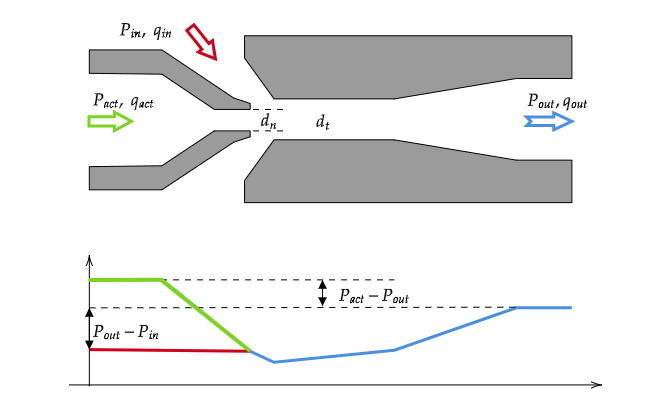

* $p_{act}$ - давление рабочего флюида, атм 
* $q_{act}$ - расход рабочего флюида, м$^3$/сут
* $\rho_{act}$ - плотность рабочего флюида, кг/м$^3$
* $p_{in}$ - давление на входе в струйный насос, давление перекачиваемого флюида, атм 
* $q_{in}$ - расход перекачиваемого флюида,  м$^3$/сут
* $\rho_{in}$ - плотность перекачиваемого флюида, кг/м$^3$
* $p_{out}$ - давление рабочего флюида, атм 
* $q_{out}$ - расход рабочего флюида, м$^3$/сут
* $d_n, d_{nozzle}$ - диаметр сопла, мм
* $d_t, d_{throat}$ - диаметр камеры смешения, мм

## 1.1 Безразмерные переменные

Для удобства введем обозначения для безразмерных параметров. Такие параметры будем помечать индексом d (dimensionless).

$d_{t\_d}$ - безразмерное отношение диаметров сопла и камеры смешения, главный геомерический параметр - безразмерный диаметр

$$d_{t\_d} = \frac{d_{throat}}{d_{nozzle}}  \tag{1.1.1.a}$$

Более общий вариант

$$F_{at\_d} = \frac{A_{throat}}{A_{nozzle}}  \tag{1.1.1.b}$$

Иногда удобно использовать 

$d_{n\_d}$ - безразмерное отношение диаметров камеры смешения и сопла

$$d_{n\_d} = \frac{d_{nozzle}}{d_{throat}}  \tag{1.1.2.a}$$

$$F_{an\_d} = \frac{A_{nozzle}}{A_{throat}}  \tag{1.1.2.b}$$

очевидно, что $F_{an\_d} = \dfrac{1}{F_{at\_d}}$

$p_{in\_d}$ - относительное/безразмерное давление на приеме струйного насоса
$$p_{in\_d} = \dfrac{p_{in}}{p_{act}} \tag{1.1.3} $$

$dp_{out\_d}$ - относительное изменение давления в струйном насосе

$$dp_{out\_d} = \frac{p_{out} - p_{in}}{p_{act} - p_{in}}  \tag{1.1.4}$$

$r_{out\_d}$ - относительная компрессия в струйном насосе
$$r_{out\_d} = \frac{p_{out} - p_{in}}{p_{act} - p_{out}}  \tag{1.1.5}$$

несложно получить 

$$ r_{out\_d} = \frac{dp_{out\_d}}{1-dp_{out\_d}} \tag{1.1.6} $$

будем потом использовать это выражение для сравнения методов.

$u_d$ - безразмерный расход перекачиваемого флюида или коэффициент инжекции

$$u_d = \frac{ q_{in} }{q_{act}} \tag{1.1.7} $$



In [2]:
po, pa, pi, dpd = sp.symbols('p_out p_act p_in dp_d')
eq = sp.Eq(dpd, (po-pi)/(pa-pi))
eq

Eq(dp_d, (-p_in + p_out)/(p_act - p_in))

In [3]:
sp.solve(eq, po)

[dp_d*p_act - dp_d*p_in + p_in]

## 1. Модель Горидько первая

взята из файла VBA который делал Кирилл


## 1.2 Расход флюида

выражение для оценки расхода рабочего флюида по давлению рабочему и давлению подачи жидкости

$$ q_{act} = 86400 c_{n} \pi \frac{ d_{n}^2} {4} \sqrt{ \dfrac{ 2(p_{act} - p_{in})}{\rho_{act}}} \tag{1.2.1} $$

где 
* $ c_{n}$ - безразмерный коэффициент сопла (определяет потери давления в сопле)
* $d_n$ - диаметр сопла, м (для круглого сопла)
* $p_{act}$ - давление рабочего флюида, Па
* $p_{in}$ - давление перекачиваемого флюида, Па
* $\rho_{act}$ - плотность рабочего флюида, кг/м$^3$
* результат - $q_{act}$ - расход рабочего флюида в м$^3$/сут

формула выглядит слишком простой для многофазного потока - наверное, по-хорошему тут должно быть что-то типа корреляции для штуцера с учетом геометрии сопла:
* Если в сопло нагнетается однофазная жидкость, а это, например, гидроструйный насос, то формула подходит
* Если в сопло нагнетается многофазный поток, это, например, установка "Тандем" для откачки газа/ГЖС из затрубного пространства при установке струйного аппарата над УЭЦН

другой хороший вопрос -  давление перекачиваемого флюида на входе в насос и на выходе из сопла может отличаться и возможно нужна какая то коррекция

не очень то и нужна пока эта формула получается


In [4]:
# определим переменные для выражения (1.2.1) чтобы сделать некоторые преобразования 
# в символьном виде
pa, pi, rhoa, dn, cn, qa = sp.symbols('p_act p_in  rho_act d_n c_n q_act')

In [5]:
# зададим уравнение (1.2.1)
# внутри сделаем преобразования единиц измерения - приведем к практическим метрическим
eq1 = sp.Eq(qa, 86400 * cn * np.pi * (dn*1e-3) ** 2 / 4 * (2 * (pa - pi)*101325 / rhoa) ** 0.5)
eq1

Eq(q_act, 0.0678584013175395*c_n*d_n**2*((202650*p_act - 202650*p_in)/rho_act)**0.5)

In [6]:
# решим уравнение (1.2.1) относительно p_in
sp.solve(eq1, pi)

[p_act - 0.00107163316130647*q_act**2*rho_act/(c_n**2*d_n**4)]

In [7]:
# функция расчета расхода жидкости через сопло струйного насоса
# похоже работает только для несжимаемой жидкости

def q_act_v1_m3day(p_act_atma=100, p_in_atma=10, rho_act_kgm3=1000, 
                   a_nozzle_m2=1e-6, c_nozzle_d=0.97 ):
    """
    расчет расхода активного флюида по давлениям - выражение (1.2.1)
    """
    p_a_Pa = p_act_atma * 101325
    p_i_Pa = p_in_atma *101325
    return (86400 * c_nozzle_d * a_nozzle_m2 * 
            (2 * (p_a_Pa - p_i_Pa) / rho_act_kgm3 )**0.5)
  

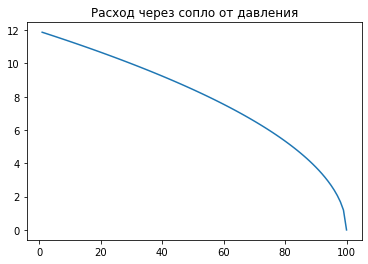

In [8]:
pa = 100
pi_arr = np.linspace(1, pa, 100)

plt.title('Расход через сопло от давления')
plt.plot(pi_arr, q_act_v1_m3day(pa,pi_arr))
plt.show()

## 1.3 Безразмерный перепад давления при нулевом расходе 

$$ \left. dp_{out\_d} \right|_{q=0}= 2.1 e^{-0.824 d_{t\_d}} \tag{1.3.1}$$

надо бы понять откуда эта формула и дать ссылки

эта формула из статьи [1]

1. https://www.researchgate.net/publication/323521417_Express_method_of_jet_pump_characteristics_calculation_for_well_operation



In [9]:
def dp_out_q0_v1_d(d_t_d=3):
  """
  расчет безразмерного перепада давления нулевом расходе рабочего флюида (1.3.1) 
  """
  return 2.1 * np.exp(-0.824 * d_t_d)

## 1.4 Условия достижения кавитационного предела

Безразмерный перепад давления при котором происходит переход к кавитационному режиму 

$$ \left. dp_{out\_d} \right|_{cav}= \left(-0.354 d_{t\_d} + 1.0562\right) + \left(0.5089 d_{t\_d}^3 - 2.3377d_{t\_d}^2 + 3.5781d_{t\_d} -2.644\right)p_{in\_d}   \tag{1.4.1} $$

тут странно, что кавитация не зависит от свойств флюида - что скорее всего неверно? - если мы откачиваем струей жидкости ГЖС, то до газосодержания 40% в среднеинтегральных координатах будет одинаково

ХОТЯ было бы неплохо вообще разобраться с процессом кавитации в струйном насосе и описать, что происходит дступным языком

Коэффициент инжекции для кавитационного режима

$$ \left. u_d \right|_{cav} = 0.328  {d_{t\_d}}^{3.1611} {p_{in\_d}}^{0.6128} \tag{1.4.2} $$


In [10]:
def dp_out_cav_v1_d(d_t_d=3, p_in_d=0.1):
  """
  Безразмерный перепад давления при котором происходит 
  переход к кавитационному режиму   (1.4.1)
  """
  return (-0.354 * d_t_d + 1.0562) \
         + (0.5089 * d_t_d ** 3 - 2.3377 * d_t_d ** 2 + 3.5781 * d_t_d - 2.644) \
         * p_in_d


def u_cav_v1_d(d_t_d=3, p_in_d=0.1):
  """
  коэффициент инжекции для кавитационного режима (1.4.2)
  """
  return 0.328 * d_t_d ** 3.1611 * p_in_d ** 0.6128

In [11]:
def dp_out_v1_d(u_d, 
                d_nozzle_mm=2,
                d_throat_mm=6,
                p_act_atma=100,
                p_in_atma=10,
                rho_act_kgm3=1000, 
                c_nozzle=0.97):
  """
  расчет характеристики струйного насоса для произвольного значения коэффициента 
  инжекции
  """

  # оценим размерный расход через сопло
  a_n_m2 = 1e-6 * np.pi * d_nozzle_mm * d_nozzle_mm / 4 
  
  q_act = q_act_v1_m3day(p_act_atma=p_act_atma, p_in_atma=p_in_atma, 
                         rho_act_kgm3=rho_act_kgm3, 
                         a_nozzle_m2=a_n_m2, c_nozzle_d=0.97)
  
  d_t_d = d_throat_mm / d_nozzle_mm
  p_in_d = p_in_atma / p_act_atma

  # найдем безразмерный перепад давления для нулевого расхода 
  # перекачиваемой жидкости
  u0 = 0
  dp0 = dp_out_q0_v1_d(d_t_d)

  # оценим кавитационный предел
  u1 = u_cav_v1_d(d_t_d, p_in_d)
  dp1 = dp_out_cav_v1_d(d_t_d, p_in_d) 
  
  # результат вернем как два массива/числа
  #   1 - безразмерный перепад давления для заданного расхода
  #   2 - размерный расход перекачиваемого флюида
  return np.where(u_d<u1,
                  dp0 + u_d / u1 * (dp1 - dp0),
                  0), u_d * q_act

In [12]:
uarr = np.linspace(0, 5, 100)
dparr = dp_out_v1_d(uarr)

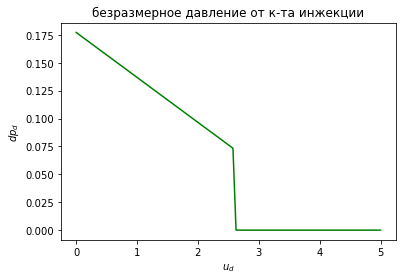

In [13]:
plt.plot(uarr, dparr[0], color = 'green')
plt.xlabel('$u_d$')
plt.ylabel('$dp_d$')
plt.title('безразмерное давление от к-та инжекции')
plt.show()

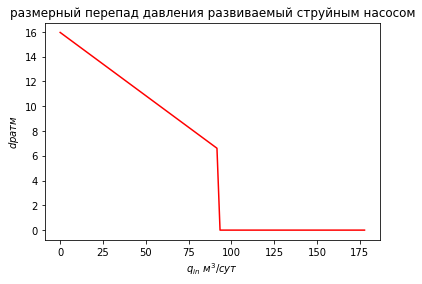

In [14]:
p_act = 100
p_in = 10
poarr = dparr[0]*(p_act - p_in) 

plt.plot(dparr[1], poarr, color = 'red')
plt.xlabel('$q_{in} \ м^3/сут$')
plt.ylabel('$dp атм$')
plt.title('размерный перепад давления развиваемый струйным насосом')
plt.show()

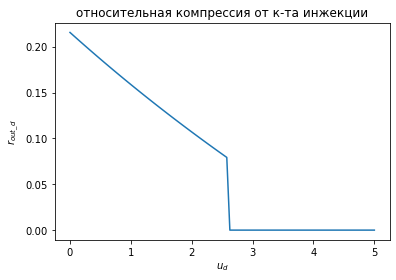

In [16]:
routarr = dparr[0] / (1 - dparr[0])
plt.plot(uarr, routarr)
plt.xlabel('$u_d$')
plt.ylabel('$r_{out\_d}$')
plt.title('относительная компрессия от к-та инжекции')
plt.show()

# 2.Модель Pipesim вторая

для сравнения приведем модель реализованную в pipesim 

опишем вспомогательные переменные необходимые для построения модели 

$F_{\rho\_d}$ - относительная плотность добываемого флюида
$$F_{\rho\_d} = \frac{\rho_{in}}{\rho_{act}} \tag{2.1.1} $$

$F_{q\_d}$ - безразмерный расход добываемого флюида
$$F_{q\_d} = u_d = \frac{q_{in}}{q_{act}}  \tag{2.1.2}$$

$F_{m\_d}$ - отношение масс добываемого и рабочего флюидов, или безразмерная добываемая масса
$$F_{m\_d} = F_{\rho\_d} u_d  \tag{2.1.3}$$

$B$ - вспомогательная переменная - геометрический фактор
$$ B = \frac{(1-2F_{an\_d}){F_{an\_d}}^2}{(1-F_{an\_d})^2} \tag{2.1.4} $$

$K_{td}$ - коэффициент потерь между рабочей камерой и диффузором, по умолчанию можно принять $K_{td}=0.2$

$K_n$ - коэффициент потерь сопла, по умолчанию можно принять $K_n = 0.03$. Похоже $K_n = 1-c_n$





тогда можно определить давление на выкиде из насоса по следующей зависимости

$$ r_{out\_d} = \frac{2F_{an\_d}+B{F_{m\_d}}^2 - (1+K_{td}){F_{an\_d}}^2(1+F_{m\_d})^2 }{(1+K_n) - \left( 2F_{an\_d}+B{F_{m\_d}}^2 - (1+K_{td}){F_{an\_d}}^2(1+F_{m\_d})^2 \right)}  \tag{2.2.1} $$

выражение для оценки кавитационного предела

$$u_{cav} =\left( \frac{1-F_{an\_d}}{F_{an\_d}} \right) \sqrt{\frac{(1+k_n)p_{in}}{1.35(p_{act}-p_{in})+p_{in}}} $$

еще по идее надо проверить критерий оценки сверхзвуковой скорости, но там надо иметь расчет скорости звука в среде, которого пока нет

In [17]:
def r_out_v2_d(u_d, 
               d_nozzle_mm=2,
               d_throat_mm=6,
               p_act_atma=100,
               p_in_atma=10,
               rho_act_kgm3=1000,
               rho_in_kgm3=1000, 
               k_n=0.03,
               k_td=0.2):
  """
  расчет характеристики струйного насоса для произвольного значения коэффициента 
  инжекции
  """
  a_n_m2 = 1e-6 * np.pi * d_nozzle_mm * d_nozzle_mm / 4 
  a_t_m2 = 1e-6 * np.pi * d_throat_mm * d_throat_mm / 4 

  Fan = a_n_m2 / a_t_m2
  Frho = rho_in_kgm3 / rho_act_kgm3
  Fm = u_d * Frho

  B = (1 - 2 * Fan) * Fan ** 2 / (1-Fan) **2

  C = 2 * Fan + B * Fm ** 2 - (1 + k_td) * Fan ** 2 * (1 + Fm) ** 2 

  u_cav = (1-Fan)/Fan * np.sqrt ((1+k_n)*p_in_atma/(1.35*(p_act_atma-p_in_atma)+p_in_atma))
  # тут тоже косяк - кавитационный предел зависит от p_in_atma а значит и от u_d

  return np.where(u_d<u_cav, C / ((1+k_n) - C),0)

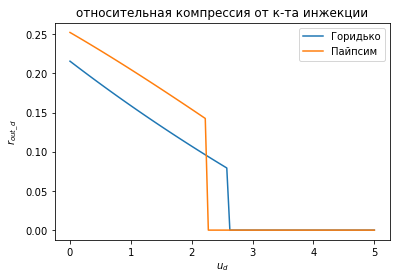

In [18]:
plt.plot(uarr, routarr, label='Горидько')
plt.plot(uarr, r_out_v2_d(uarr, rho_act_kgm3 = 1000, rho_in_kgm3=1000,
                          k_n=0.03, k_td=0.2), label='Пайпсим')
plt.xlabel('$u_d$')
plt.ylabel('$r_{out\_d}$')
plt.title('относительная компрессия от к-та инжекции')
plt.legend()
plt.show()

подбором настроечных параметров - кривые можно достаточно хорошо соместить - хорошо бы разобраться для каких условий получены первые варианты

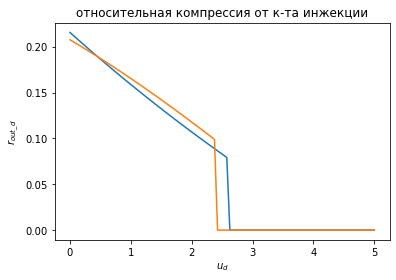

In [19]:
plt.plot(uarr, routarr, label='Горидько')
plt.plot(uarr, r_out_v2_d(uarr, rho_act_kgm3 = 1000, rho_in_kgm3=1000,
                          k_n=0.2, k_td=0.3), label='Пайпсим')
plt.xlabel('$u_d$')
plt.ylabel('$r_{out\_d}$')
plt.title('относительная компрессия от к-та инжекции')
plt.show()

# 3. Вариант расчет из файла Горидько по Соколову Зингеру для расчета жидкостно-газового эжектора


## 3.1 Безразмерный перепад давления при нулевом расходе вариант 3 (СЗ)

$$ \left. dp_{out\_d} \right|_{q=0} =  \frac{0.95^2}{{d_{t\_d}}^2}  (2 \cdot 0.975 - (2 - 0.9^2) \frac{1}{{d_{t\_d}}^2})$$

надо бы понять откуда эта формула и дать ссылки 

In [20]:
dtd = sp.Symbol('d_td')
fi1, fi2, fi3 = sp.symbols('fi_1 fi_2 fi_3')

In [21]:
dpq0 = fi1 ** 2 * 1 / dtd ** 2 * (2 * fi2 - (2 - fi3 ** 2) * 1 / dtd**2)
dpq0

fi_1**2*(2*fi_2 - (2 - fi_3**2)/d_td**2)/d_td**2

In [22]:
dpq0.subs(fi1, 0.95).subs(fi2, 0.975).subs(fi3, 0.9)

0.9025*(1.95 - 1.19/d_td**2)/d_td**2

In [23]:
sp.simplify(dpq0.subs(fi1, 0.95).subs(fi2, 0.975).subs(fi3, 0.9))

(1.759875*d_td**2 - 1.073975)/d_td**4

таким образом выражение для безразмерного перепада давления при нулевом расходе вариант 3 (СЗ)

$$ \left. dp_{out\_d} \right|_{q=0} =  \frac{ 1.759875 {d_{t\_d}}^2 - 1.073975  }{{d_{t\_d}}^4}  $$


In [24]:
ug = sp.symbols('u_g')

In [25]:
dpq = fi1 ** 2 * 1 / dtd ** 2 * (2 * fi2 - (2 - fi3 ** 2) * 1 / dtd**2 * (1+ug)**2)
dpq

fi_1**2*(2*fi_2 - (2 - fi_3**2)*(u_g + 1)**2/d_td**2)/d_td**2

In [26]:
sp.simplify(dpq.subs(fi1, 0.95).subs(fi2, 0.975).subs(fi3, 0.9))

(1.759875*d_td**2 - 1.073975*(u_g + 1)**2)/d_td**4

выражение для безразмерного давления на выкиде при произвольном коэффициенте инжекции


$$ dp_{out\_d}  =  \frac{ 1.759875 d_{t\_d}^2 - 1.073975 (u_g+1)^2 }{{d_{t\_d}}^4}  $$


хороший вопрос- тут $u_g$ это газ или все же жидкость?

In [27]:
def dp_out_v3_d(u_d, 
                d_nozzle_mm=2,
                d_throat_mm=6,
                p_act_atma=100,
                p_in_atma=10,
                rho_act_kgm3=1000, 
                c_nozzle=0.97):
  """
  расчет характеристики струйного насоса для произвольного значения коэффициента 
  инжекции
  """
  a_n_m2 = 1e-6 * np.pi * d_nozzle_mm * d_nozzle_mm / 4 

  d_t_d = d_throat_mm / d_nozzle_mm
  p_in_d = p_in_atma / p_act_atma

  u0 = 0
  dp0 = dp_out_q0_v1_d(d_t_d)
  u1 = u_cav_v1_d(d_t_d, p_in_d)
  dp1 = dp_out_cav_v1_d(d_t_d, p_in_d) 
  # косяк - кавитационный предел из метода 1

  return np.where(u_d<u1,
                  (1.759875 * d_t_d**2 - 1.073975*(u_d+1)**2) / d_t_d**4,
                  0)

In [28]:
uarr = np.linspace(0, 5, 100)
dparr3 = dp_out_v3_d(uarr)
routarr3 = dparr3 / (1 - dparr3)

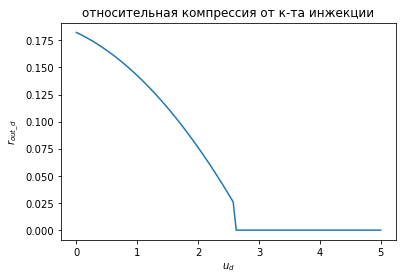

In [29]:
plt.plot(uarr, dparr3)
plt.xlabel('$u_d$')
plt.ylabel('$r_{out\_d}$')
plt.title('относительная компрессия от к-та инжекции')
plt.show()

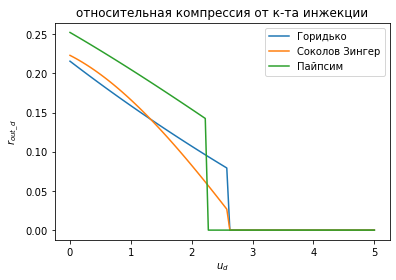

In [30]:
plt.plot(uarr, routarr, label='Горидько')
plt.plot(uarr, routarr3, label='Соколов Зингер')
plt.plot(uarr, r_out_v2_d(uarr, rho_act_kgm3 = 1000, rho_in_kgm3=1000,
                          k_n=0.03, k_td=0.2), label='Пайпсим')
plt.xlabel('$u_d$')
plt.ylabel('$r_{out\_d}$')
plt.title('относительная компрессия от к-та инжекции')
plt.legend()
plt.show()

# вывод 02.02.2022

* Похоже методика в пайпсиме не так плоха
* Надо бы разобраться с кавитационными пределами
* Надо разобраться в каких координатах правильно строить характеристики
* Что за кавитационным пределом
* Скорость звука надо учитывать - но это не точно
